In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, svm, inspection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

In [2]:
#Gets CSV file and skips metadata
StartData1 = pd.read_csv("IMU Exported Data\Drink Task\Trial 1\A_D422CD00606D_20240314_113325.csv", skiprows = 7)
StartData1.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ldavi\AppData\Local\Temp\ipykernel_35684\2074586741.py:2: SyntaxWarning: invalid escape sequence '\D'
  StartData1 = pd.read_csv("IMU Exported Data\Drink Task\Trial 1\A_D422CD00606D_20240314_113325.csv", skiprows = 7)


,PacketCounter,SampleTimeFine,Quat_W,Quat_X,Quat_Y,Quat_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z
0,0,2267718526,0.814243,-0.086596,0.296727,-0.491389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2267735193,0.814243,-0.086613,0.296732,-0.491382,-3.969944,-4.296816,8.036847,0.886097,0.624963,0.906190
2,2,2267751860,0.814225,-0.086656,0.296774,-0.491379,-3.944887,-4.300301,8.044664,0.549252,0.717501,0.928358
3,3,2267768527,0.814236,-0.086663,0.296770,-0.491363,-3.952041,-4.327610,8.070212,0.931303,0.549610,1.070380
4,4,2267785194,0.814271,-0.086636,0.296734,-0.491331,-3.944123,-4.295879,8.086485,1.351249,0.580307,1.002187


In [3]:
#Edit and save data to variable
StartData1Edit = StartData1.drop(columns = ["PacketCounter"])
StartData1Edit.head()

,SampleTimeFine,Quat_W,Quat_X,Quat_Y,Quat_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z
0,2267718526,0.814243,-0.086596,0.296727,-0.491389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2267735193,0.814243,-0.086613,0.296732,-0.491382,-3.969944,-4.296816,8.036847,0.886097,0.624963,0.906190
2,2267751860,0.814225,-0.086656,0.296774,-0.491379,-3.944887,-4.300301,8.044664,0.549252,0.717501,0.928358
3,2267768527,0.814236,-0.086663,0.296770,-0.491363,-3.952041,-4.327610,8.070212,0.931303,0.549610,1.070380
4,2267785194,0.814271,-0.086636,0.296734,-0.491331,-3.944123,-4.295879,8.086485,1.351249,0.580307,1.002187


In [4]:
#This is to change to cartesean coordinates

# Extract quaternion components from the DataFrame
dq_W = StartData1['dq_W'].values
dq_X = StartData1['dq_X'].values
dq_Y = StartData1['dq_Y'].values
dq_Z = StartData1['dq_Z'].values

# Function to compute Cartesian coordinates from quaternions
def quaternion_to_cartesian(w, x, y, z):
    # Convert the quaternion into rotation matrix (example for identity vector rotation)
    x_cart = 2 * (x * z + w * y)
    y_cart = 2 * (y * z - w * x)
    z_cart = 1 - 2 * (x**2 + y**2)
    
    return x_cart, y_cart, z_cart

# Apply the function to each row of the DataFrame
cartesian_coordinates = np.array([quaternion_to_cartesian(w, x, y, z) for w, x, y, z in zip(dq_W, dq_X, dq_Y, dq_Z)])

# Extract x, y, z coordinates
x = cartesian_coordinates[:, 0]
y = cartesian_coordinates[:, 1]
z = cartesian_coordinates[:, 2]

# Now x_coords, y_coords, z_coords contain the computed Cartesian coordinates


KeyError: 'dq_W'

In [19]:
#This is for cartesian coordinates

#x, y, z = StartData1Edit['Euler_X'], StartData1Edit['Euler_Y'], StartData1Edit['Euler_Z']

In [20]:
#3D plot of the Euler coordinates


# Create a 3D scatter plot
trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5, color='blue'))

# Set layout for the plot
layout = go.Layout(scene=dict(
    xaxis_title='Euler_X',
    yaxis_title='Euler_Y',
    zaxis_title='Euler_Z'),
    title="Interactive 3D Plot")

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the interactive plot
fig.show()

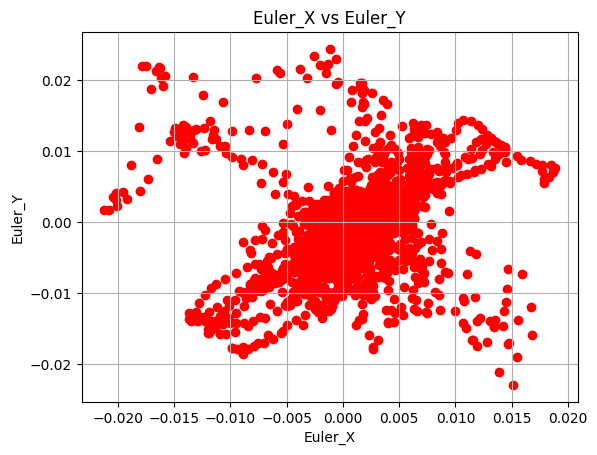

In [24]:
# Plot Euler_X vs Euler_Y
plt.figure()
plt.scatter(x, y, c='r', marker='o')
plt.title("Euler_X vs Euler_Y")
plt.xlabel("Euler_X")
plt.ylabel("Euler_Y")
plt.grid(True)
plt.show()


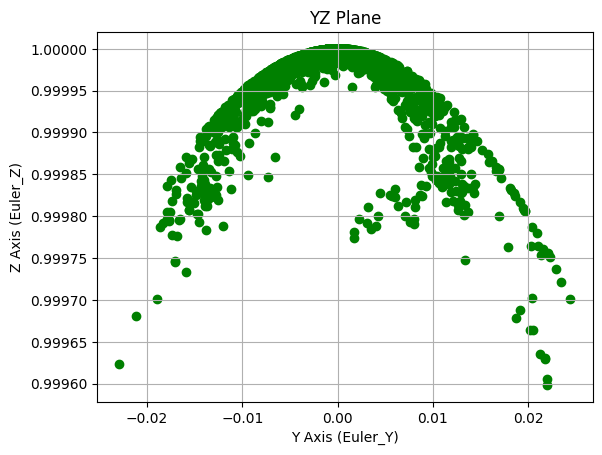

In [26]:
# Plot the yz plane
plt.figure()
plt.scatter(y, z, c='green', marker='o')
plt.title('YZ Plane')
plt.xlabel('Y Axis (Euler_Y)')
plt.ylabel('Z Axis (Euler_Z)')
plt.grid(True)
plt.show()

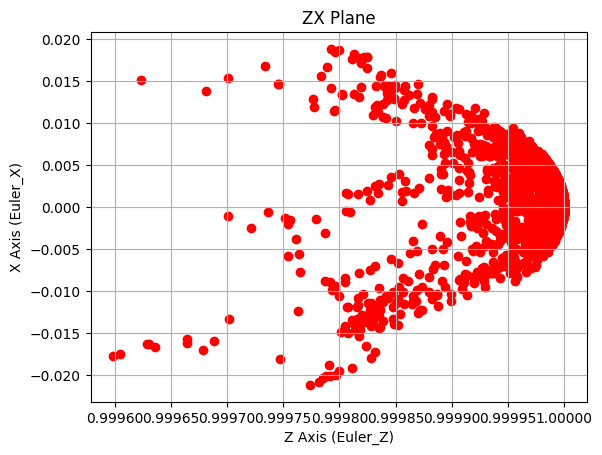

In [28]:
# Plot the zx plane
plt.figure()
plt.scatter(z, x, c='red', marker='o')
plt.title('ZX Plane')
plt.xlabel('Z Axis (Euler_Z)')
plt.ylabel('X Axis (Euler_X)')
plt.grid(True)
plt.show()